## OBJECTIVE 

The data is related with direct marketing campaigns (phone calls) of a Portugese Bank institution.
The classification goal is to predict if the client will subscribve to a term deposit (y).

## Domain Analysis

#### 1. Introduction

The dataset provided is of a Portuguese bank. They are a banking institution.
We aim to find whether a marketing campaign has helped them increase the number of people who have subscribed to a term deposit.

##### 2. Contextual factors 

Factors in our dataset like the Consumer price index tell us the relative price a customer has paid for the same product. Other factors like the consumer confidence index which tells us how consumers are feeling about the current market situation and the future of the market, and Euribor which is a reference rate that is constructed from the average interest rate at which eurozone banks offer unsecured short-term lending on the inter-bank market, and net rate employed which is The variable, nr  employed, refers to the number of employees in a bank and is also an influential variable on clients' intention to subscribe to the term deposit.

#### 3. Data and Information

The data we have in our dataset is a mixture of categorical Data and Numerical data.




### 1. Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2. Importing the Data

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data=pd.read_csv("bank-additional-full.csv")

In [4]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


In [5]:
data.rename(columns={'loan':'personal_loan','contact':'communication_means','month':'communication_month','day_of_week':'communication_day','fduration_of_call':'duration_of_call','pdays':'last_contacted','previous':'how_many_times_contacted','poutcome':'last_call_outcome','Result(y)':'Result (y)','emp.var.rate':'emp_var_rate'},inplace=True)

### 3. Finding the Null values 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       41188 non-null  int64  
 1   job                       41188 non-null  object 
 2   marital                   41188 non-null  object 
 3   education                 41188 non-null  object 
 4   default                   41188 non-null  object 
 5   housing                   41188 non-null  object 
 6   personal_loan             41188 non-null  object 
 7   communication_means       41188 non-null  object 
 8   communication_month       41188 non-null  object 
 9   communication_day         41188 non-null  object 
 10  duration                  41188 non-null  int64  
 11  campaign                  41188 non-null  int64  
 12  last_contacted            41188 non-null  int64  
 13  how_many_times_contacted  41188 non-null  int64  
 14  last_c

### 4. General info about the Data

In [7]:
data.head()

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [8]:
data.describe()

,age,duration,campaign,last_contacted,how_many_times_contacted,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


In [9]:
data.describe(include="O")

,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,last_call_outcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


###  5. Exploratory Data Analysis 

#### A. Univariant Analysis 

In [10]:
import sweetviz as sv # library for univariant analysis
my_report=sv.analyze(data) # passing the original dataframe
my_report.show_html() # arguments will generate to the library 

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
data.select_dtypes(include=['int64','float64']).columns

Index(['age', 'duration', 'campaign', 'last_contacted',
       'how_many_times_contacted', 'emp_var_rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [12]:
data.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'personal_loan',
       'communication_means', 'communication_month', 'communication_day',
       'last_call_outcome', 'y'],
      dtype='object')

In [13]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing',
       'personal_loan', 'communication_means', 'communication_month',
       'communication_day', 'duration', 'campaign', 'last_contacted',
       'how_many_times_contacted', 'last_call_outcome', 'emp_var_rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
data1=data[['age', 'duration', 'campaign', 'last_contacted',
       'how_many_times_contacted', 'emp_var_rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]
data2=data[['job', 'marital', 'education', 'default', 'housing', 'personal_loan',
       'communication_means', 'communication_month', 'communication_day',
       'last_call_outcome']]

In [15]:
# Histplots for Data1 (Numerical Data)

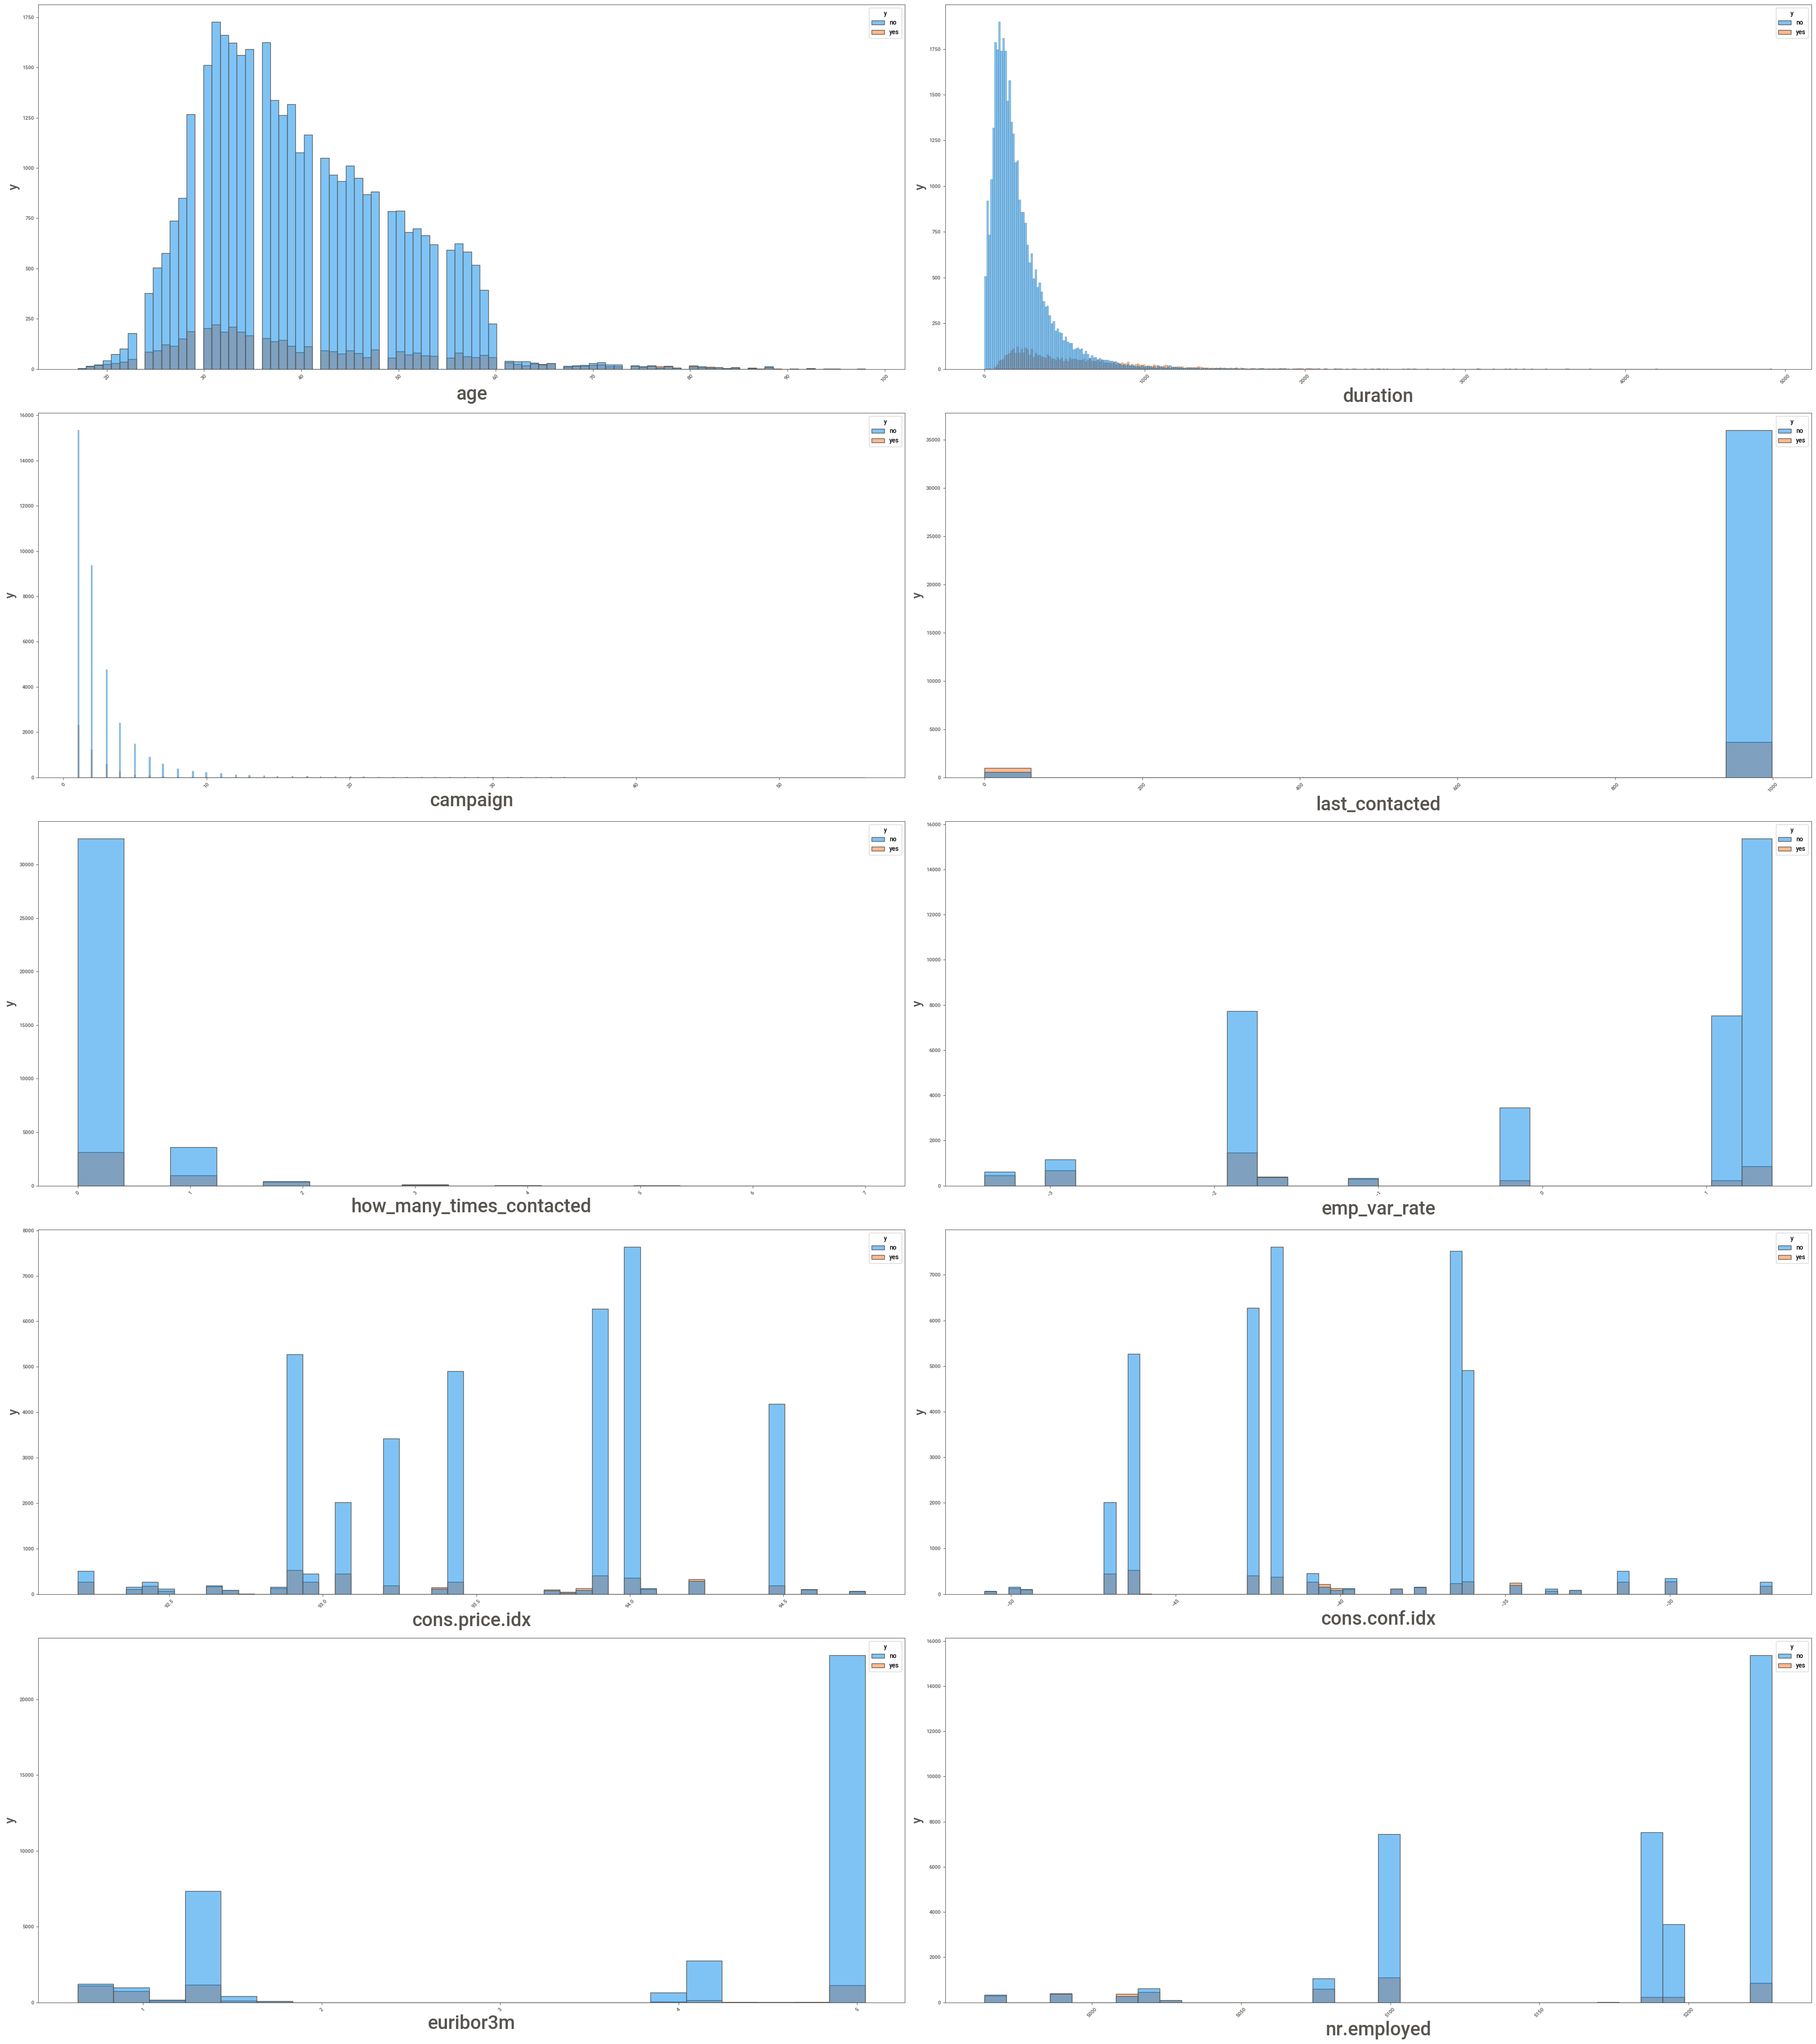

In [16]:
plt.figure(figsize=(40,45), facecolor='white')

plotnumber = 1

for column in data1:
    if plotnumber <= 16:
        plt.subplot(5, 2, plotnumber)
        sns.histplot(x=data1[column], hue=data['y'])
        plt.xlabel(column, fontsize=30)  # Decreased the fontsize for better visualization
        plt.ylabel("y", fontsize=20, rotation=90)
        plt.xticks(rotation=45)
    plotnumber += 1

plt.tight_layout()

In [17]:
# Count Plot (Categorical data)

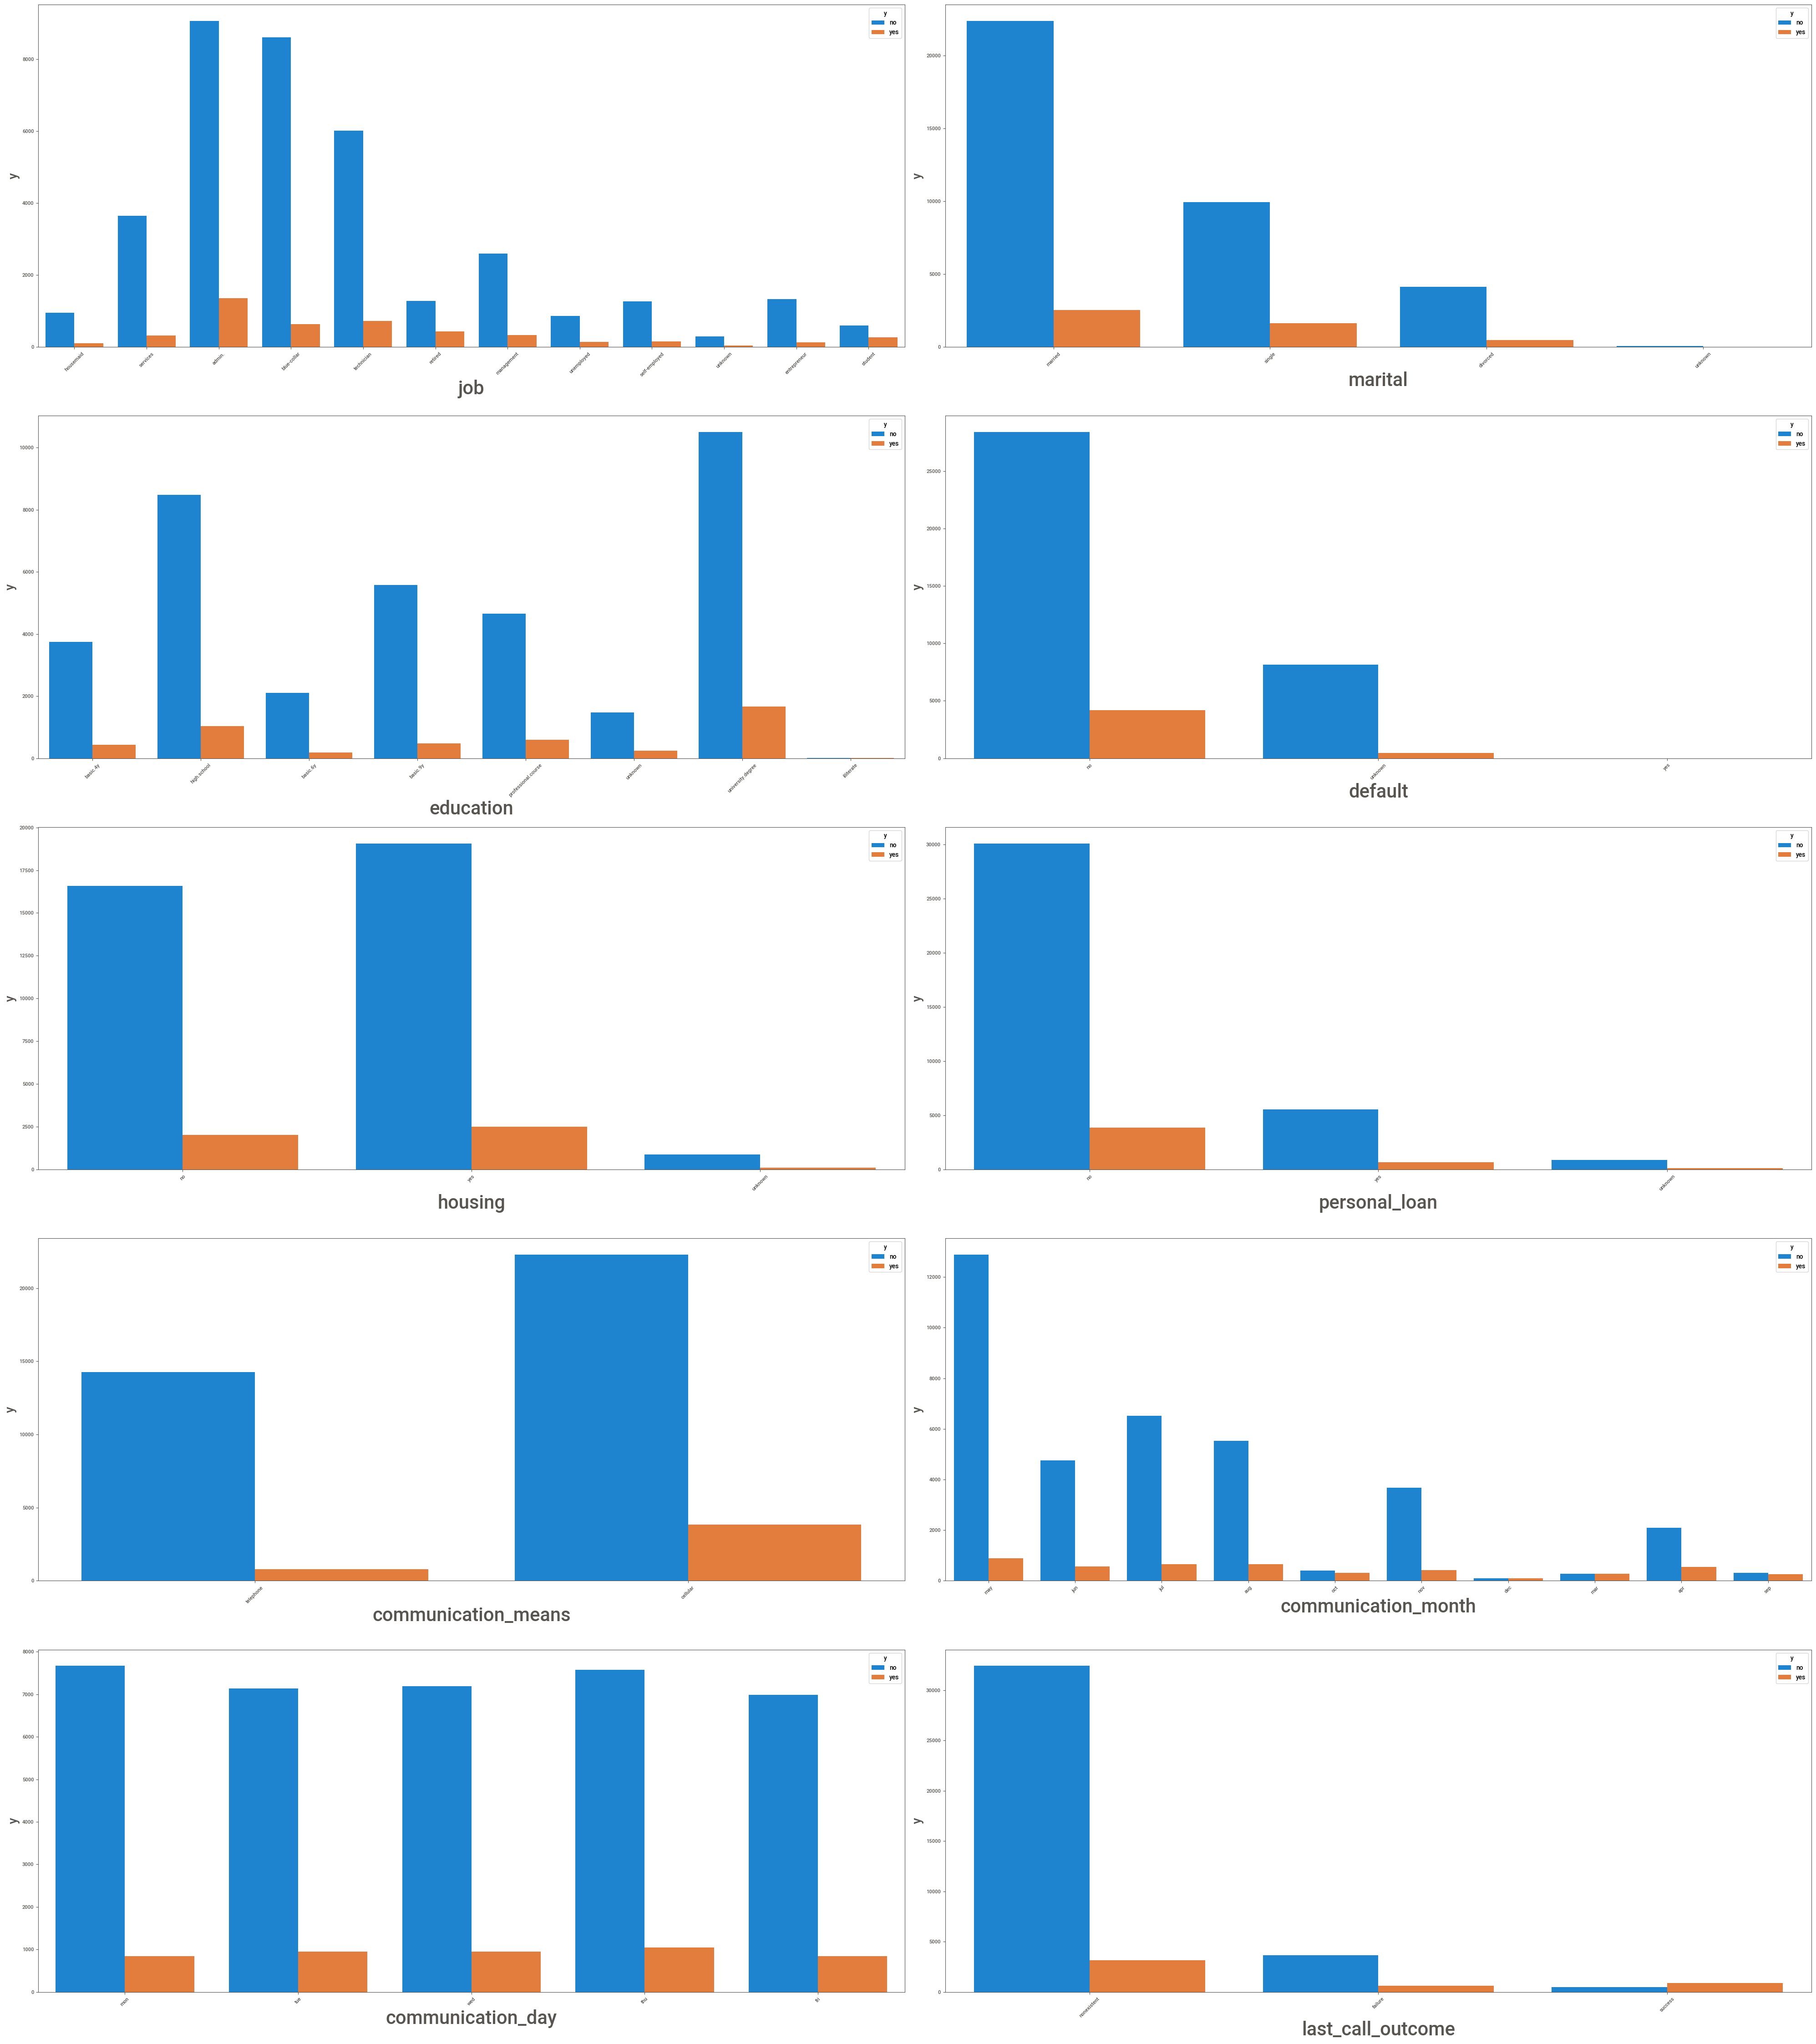

In [18]:
plt.figure(figsize=(40,45), facecolor='white')

plotnumber = 1

for column in data2:
    if plotnumber <= 16:
        plt.subplot(5, 2, plotnumber)
        sns.countplot(x=data2[column], hue=data['y'])
        plt.xlabel(column, fontsize=30)  # Decreased the fontsize for better visualization
        plt.ylabel("y", fontsize=20, rotation=90)
        plt.xticks(rotation=45)
    plotnumber += 1

plt.tight_layout()

#### B. Bivariant Analysis

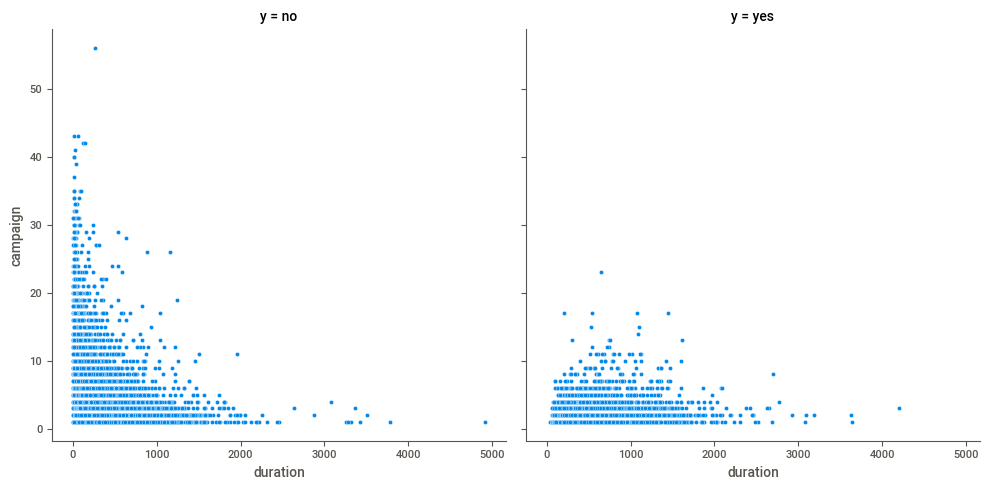

In [19]:
sns.relplot(x='duration',y='campaign',col='y',data=data)
plt.show()

#### Analysis For Bi-Variant

In the Bi variant analyis we can see the relation of call duration with wether a call atendee has subscribed to the term deposit.

#### C. Multi Variant Analysis

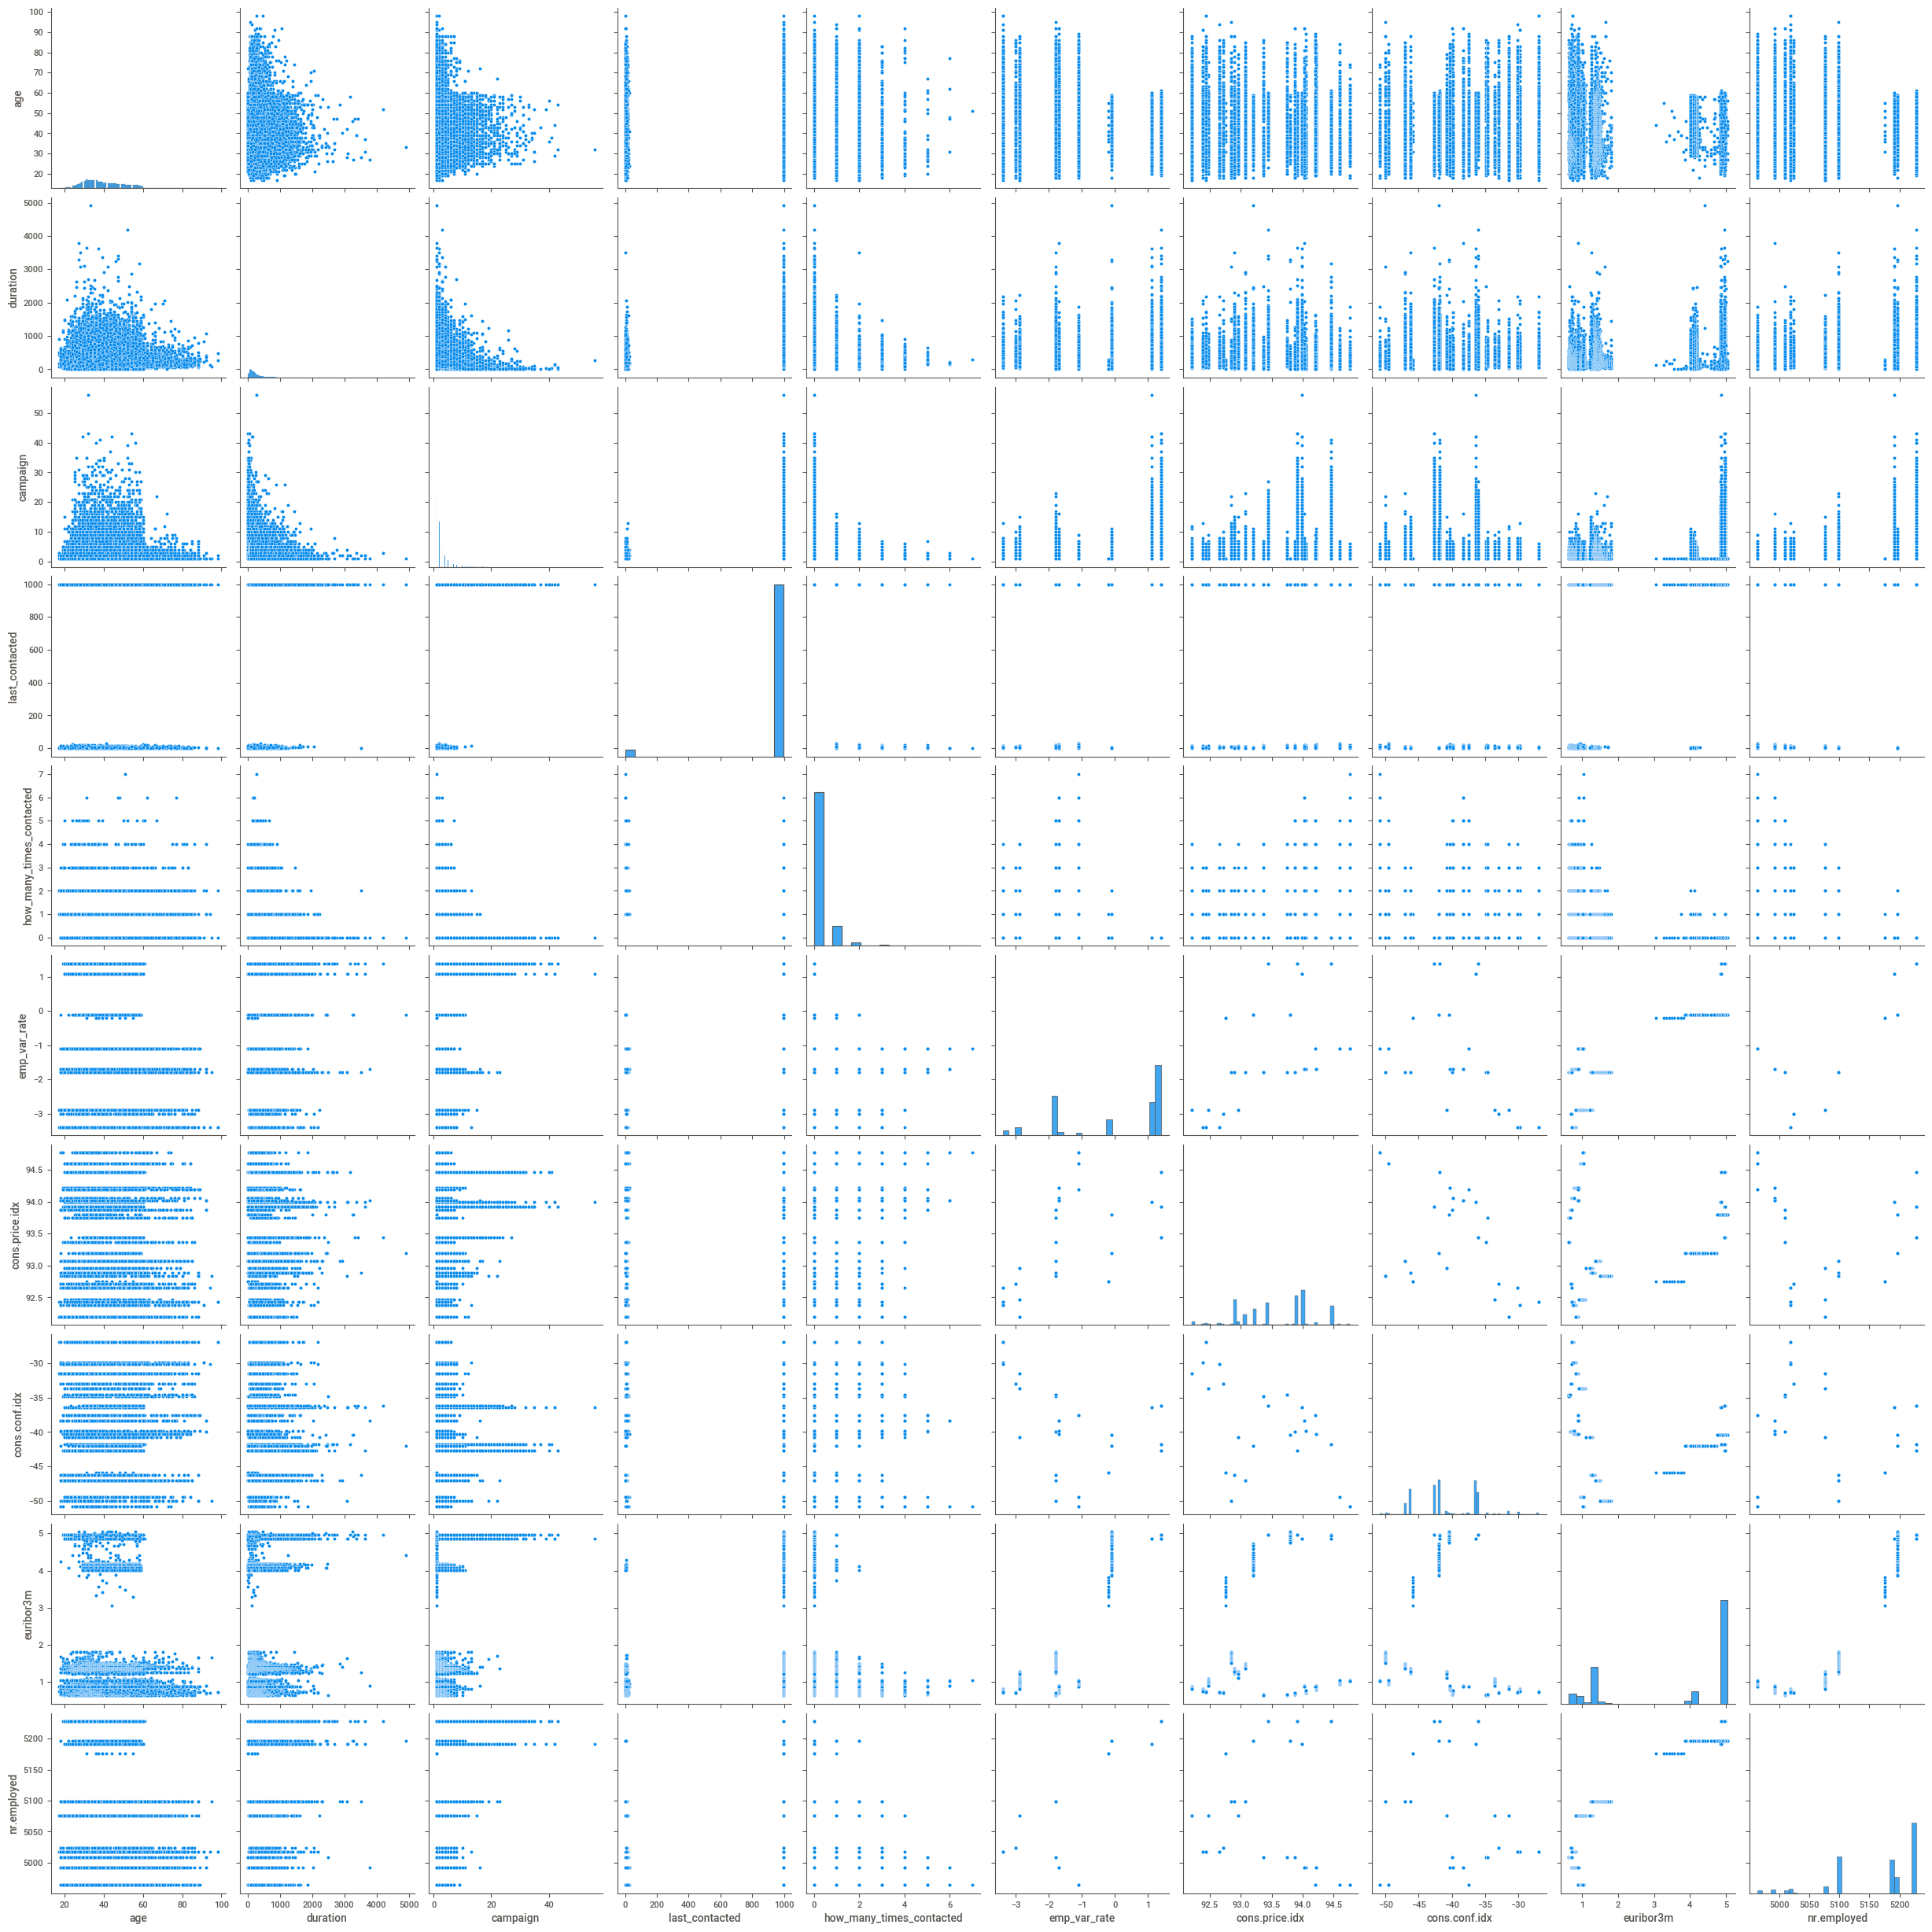

In [23]:
sns.pairplot(data)

### On the basis of the analyses reports we can observe that :
     1. People aged between 30-40 years were contacted the most
     2. People from "admin" job role and people from "blue-collared" job roles were contacted the most 
     3. Married people were contacted the most followed by single people
     4. people with 'university' education followed by 'high school' education were contacted the most 
     5. we can see that most of the people that were contacted did not have a default status
     6. 52% of the people contacted had prior housing loans
     7. 82% of the people contacted did not have any sort of personal loan running
     8. 63% of the people were contacted via 'cellular' means whereas 37% were contacted via 'telephone'
     9. most people were contacted in the month of may
     10. The days in which people were contacted were evenly spread across the weekdays
     11. The duration of calls were on an average of 4.3 minutes
     12. A person was contacted an average of 2.6 times
     13. 86% of the people were contacted for the first time 
     14. The data from the success of previous calls is mostly non-existent 

### 6. Data Preprocessing and Feature Engineering

In [24]:
data.isnull().sum()

age                         0
job                         0
marital                     0
education                   0
default                     0
housing                     0
personal_loan               0
communication_means         0
communication_month         0
communication_day           0
duration                    0
campaign                    0
last_contacted              0
how_many_times_contacted    0
last_call_outcome           0
emp_var_rate                0
cons.price.idx              0
cons.conf.idx               0
euribor3m                   0
nr.employed                 0
y                           0
dtype: int64

In [25]:
# There are no null values in the dataset

#### Converting Categorical data into Numerical data 

In [26]:
data.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'personal_loan',
       'communication_means', 'communication_month', 'communication_day',
       'last_call_outcome', 'y'],
      dtype='object')

In [86]:
# Manual Encoding

In [27]:
# Job

In [28]:
data.job.value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [29]:
data.job=data.job.map({'admin.':11,'blue-collar':10,'technician':9,'services':8,'management':7,'retired':6,'entrepreneur':5,'self-employed':4,'housemaid':3,'unemployed':2,'student':1,'unknown':0})

In [30]:
data.head()

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,8,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,8,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,11,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,8,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [31]:
# Marital

In [32]:
data.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [33]:
data.marital=data.marital.map({'married':3,'single':2,'divorced':1,'unknown':0})

In [34]:
data.head()

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,3,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,8,3,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,8,3,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,11,3,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,8,3,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [35]:
# Education

In [36]:
data.education.value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [37]:
data.education=data.education.map({'university.degree':7,'high.school':6,'basic.9y':5,'professional.course':4,'basic.4y':3,'basic.6y':2,'unknown':1,'illiterate':0})

In [38]:
data.head()

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,3,3,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,8,3,6,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,8,3,6,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,11,3,2,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,8,3,6,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [39]:
# Default

In [40]:
data.default.value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [41]:
data.default=data.default.map({'no':2,'unknown':1,'yes':0})

In [42]:
data.head()

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,3,3,2,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,8,3,6,1,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,8,3,6,2,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,11,3,2,2,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,8,3,6,2,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [43]:
# Housing

In [44]:
data.housing.value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [45]:
data.housing=data.housing.map({'yes':2,'no':1,'unknown':0})

In [46]:
data.head()

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,3,3,2,1,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,8,3,6,1,1,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,8,3,6,2,2,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,11,3,2,2,1,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,8,3,6,2,1,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [47]:
# personal_loan 

In [48]:
data.personal_loan .value_counts()

personal_loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [49]:
data.personal_loan =data.personal_loan .map({'no':2,'yes':1,'unknown':0})

In [50]:
data.head()

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,3,3,2,1,2,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,8,3,6,1,1,2,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,8,3,6,2,2,2,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,11,3,2,2,1,2,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,8,3,6,2,1,1,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [51]:
# communication_means

In [52]:
data.communication_means.value_counts()

communication_means
cellular     26144
telephone    15044
Name: count, dtype: int64

In [53]:
data.communication_means=data.communication_means.map({'cellular':1,'telephone':0})

In [54]:
data.head()

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,3,3,2,1,2,0,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,8,3,6,1,1,2,0,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,8,3,6,2,2,2,0,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,11,3,2,2,1,2,0,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,8,3,6,2,1,1,0,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [55]:
# communication_month

In [56]:
data.communication_month.value_counts()

communication_month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [57]:
data.communication_month=data.communication_month.map({'may':9,'jul':8,'aug':7,'jun':6,'nov':5,'apr':4,'oct':3,'sep':2,'mar':1,'dec':0})

In [58]:
data.head()

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,3,3,2,1,2,0,9,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,8,3,6,1,1,2,0,9,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,8,3,6,2,2,2,0,9,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,11,3,2,2,1,2,0,9,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,8,3,6,2,1,1,0,9,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [59]:
# communication_day

In [60]:
data.communication_day.value_counts()

communication_day
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

In [61]:
data.communication_day=data.communication_day.map({'thu':4,'mon':3,'wed':2,'tue':1,'fri':0})

In [62]:
data.head()

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,3,3,2,1,2,0,9,3,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,8,3,6,1,1,2,0,9,3,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,8,3,6,2,2,2,0,9,3,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,11,3,2,2,1,2,0,9,3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,8,3,6,2,1,1,0,9,3,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [63]:
# last_call_outcome

In [64]:
data.last_call_outcome.value_counts()

last_call_outcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [65]:
data.last_call_outcome=data.last_call_outcome.map({'nonexistent':2,'failure':1,'success':0})

In [66]:
data.head()

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,3,3,2,1,2,0,9,3,261,1,999,0,2,1.1,93.994,-36.4,4.857,5191,no
1,57,8,3,6,1,1,2,0,9,3,149,1,999,0,2,1.1,93.994,-36.4,4.857,5191,no
2,37,8,3,6,2,2,2,0,9,3,226,1,999,0,2,1.1,93.994,-36.4,4.857,5191,no
3,40,11,3,2,2,1,2,0,9,3,151,1,999,0,2,1.1,93.994,-36.4,4.857,5191,no
4,56,8,3,6,2,1,1,0,9,3,307,1,999,0,2,1.1,93.994,-36.4,4.857,5191,no


In [67]:
# y / output

In [68]:
data.y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [69]:
data.y=data.y.map({'no':1,'yes':0})

In [70]:
data.head()

,age,job,marital,education,default,housing,personal_loan,communication_means,communication_month,communication_day,duration,campaign,last_contacted,how_many_times_contacted,last_call_outcome,emp_var_rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,3,3,2,1,2,0,9,3,261,1,999,0,2,1.1,93.994,-36.4,4.857,5191,1
1,57,8,3,6,1,1,2,0,9,3,149,1,999,0,2,1.1,93.994,-36.4,4.857,5191,1
2,37,8,3,6,2,2,2,0,9,3,226,1,999,0,2,1.1,93.994,-36.4,4.857,5191,1
3,40,11,3,2,2,1,2,0,9,3,151,1,999,0,2,1.1,93.994,-36.4,4.857,5191,1
4,56,8,3,6,2,1,1,0,9,3,307,1,999,0,2,1.1,93.994,-36.4,4.857,5191,1


#### Scaling the Data 

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing',
       'personal_loan', 'communication_means', 'communication_month',
       'communication_day', 'duration', 'campaign', 'last_contacted',
       'how_many_times_contacted', 'last_call_outcome', 'emp_var_rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [73]:
scale=MinMaxScaler()
data[['campaign','duration','how_many_times_contacted','cons.price.idx','cons.conf.idx']]=scale.fit_transform(data[['campaign','duration','how_many_times_contacted','cons.price.idx','cons.conf.idx']])

### 7. Feature Selection 

In [74]:
# Checking for correlation 

In [75]:
corr_data=data[['campaign','duration','how_many_times_contacted','cons.price.idx','cons.conf.idx']]

<Axes: >

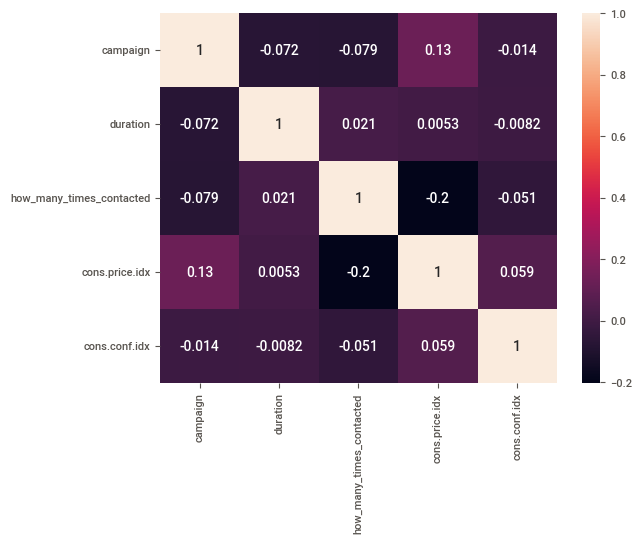

In [76]:
sns.heatmap(corr_data.corr(),annot=True)

#### Correlation Analysis
From the above heatmap we can conclude that there is no correlation between the features given in the dataset.

### 8. Model Creation  

In [77]:
# Importing necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
lr_train_predictions = logistic_regression_model.predict(X_train)
lr_test_predictions = logistic_regression_model.predict(X_test)

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
km_train_predictions = kmeans.predict(X_train)
km_test_predictions = kmeans.predict(X_test)

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_train_predictions = svm_model.predict(X_train)
svm_test_predictions = svm_model.predict(X_test)

# Dimensionality Reduction using PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Logistic Regression after PCA
logistic_regression_model_pca = LogisticRegression()
logistic_regression_model_pca.fit(X_train_pca, y_train)
lr_train_predictions_pca = logistic_regression_model_pca.predict(X_train_pca)
lr_test_predictions_pca = logistic_regression_model_pca.predict(X_test_pca)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return accuracy, f1, precision, recall

# Evaluate models
lr_train_accuracy, lr_train_f1, _, _ = calculate_metrics(y_train, lr_train_predictions)
lr_test_accuracy, lr_test_f1, _, _ = calculate_metrics(y_test, lr_test_predictions)

km_train_accuracy, km_train_f1, _, _ = calculate_metrics(y_train, km_train_predictions)
km_test_accuracy, km_test_f1, _, _ = calculate_metrics(y_test, km_test_predictions)

svm_train_accuracy, svm_train_f1, _, _ = calculate_metrics(y_train, svm_train_predictions)
svm_test_accuracy, svm_test_f1, _, _ = calculate_metrics(y_test, svm_test_predictions)

lr_train_accuracy_pca, lr_train_f1_pca, _, _ = calculate_metrics(y_train, lr_train_predictions_pca)
lr_test_accuracy_pca, lr_test_f1_pca, _, _ = calculate_metrics(y_test, lr_test_predictions_pca)

# Print results
print("Logistic Regression - Train F1 Score: {:.2f}, Test F1 Score: {:.2f}".format(lr_train_f1, lr_test_f1))
print("K-Means Clustering - Train F1 Score: {:.2f}, Test F1 Score: {:.2f}".format(km_train_f1, km_test_f1))
print("SVM - Train F1 Score: {:.2f}, Test F1 Score: {:.2f}".format(svm_train_f1, svm_test_f1))
print("Logistic Regression after PCA - Train F1 Score: {:.2f}, Test F1 Score: {:.2f}".format(lr_train_f1_pca, lr_test_f1_pca))


Logistic Regression - Train F1 Score: 0.88, Test F1 Score: 0.86
K-Means Clustering - Train F1 Score: 0.80, Test F1 Score: 0.76
SVM - Train F1 Score: 0.93, Test F1 Score: 0.85
Logistic Regression after PCA - Train F1 Score: 0.86, Test F1 Score: 0.86


### 9. Hyperparameter Tuning

In [78]:
# Hyper paarmeter Tuning for Logistic regression

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create a logistic regression model
logistic_regression_model = LogisticRegression()

# Instantiate GridSearchCV
grid_search = GridSearchCV(logistic_regression_model, param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate F1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score on Train Set: {:.4f}".format(f1_train))
print("F1 Score on Test Set: {:.4f}".format(f1_test))


Best Parameters:  {'C': 0.1, 'penalty': 'l2'}
F1 Score on Train Set: 0.8769
F1 Score on Test Set: 0.8657


In [80]:
# Hyperparameter for SVM

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an SVM model
svm_model = SVC()

# Instantiate GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate F1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print("F1 Score on Train Set: {:.4f}".format(f1_train))
print("F1 Score on Test Set: {:.4f}".format(f1_test))


Best Parameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
F1 Score on Train Set: 0.8747
F1 Score on Test Set: 0.8812


In [82]:
# hyperparameter tuning for Dimensionality Reduction using PCA

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the steps of the pipeline
steps = [
    ('scaler', StandardScaler()),   # Step 1: StandardScaler
    ('pca', PCA()),                 # Step 2: PCA
    ('svm', SVC())                  # Step 3: SVM classifier
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the hyperparameters grid
param_grid = {
    'pca__n_components': [5, 10, 15],  # Number of components to keep
    'svm__C': [0.1, 1, 10],            # Regularization parameter for SVM
    'svm__kernel': ['linear', 'poly', 'rbf']  # Kernel for SVM
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate F1 score and accuracy
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("F1 Score on Train Set: {:.4f}".format(f1_train))
print("F1 Score on Test Set: {:.4f}".format(f1_test))
print("Accuracy on Train Set: {:.4f}".format(accuracy_train))
print("Accuracy on Test Set: {:.4f}".format(accuracy_test))


Best Parameters:  {'pca__n_components': 15, 'svm__C': 1, 'svm__kernel': 'rbf'}
F1 Score on Train Set: 0.9013
F1 Score on Test Set: 0.8384
Accuracy on Train Set: 0.9050
Accuracy on Test Set: 0.8400


In [84]:
# Hyperparameter Tuning for Logistic Regression after PCA

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the steps of the pipeline
steps = [
    ('scaler', StandardScaler()),  # Step 1: StandardScaler
    ('pca', PCA()),                # Step 2: PCA
    ('logistic_regression', LogisticRegression())  # Step 3: Logistic Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the hyperparameters grid
param_grid = {
    'pca__n_components': [5, 10, 15],  # Number of components to keep
    'logistic_regression__C': [0.1, 1, 10],  # Regularization parameter for Logistic Regression
    'logistic_regression__penalty': ['l1', 'l2']  # Penalty for Logistic Regression
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate F1 score and accuracy
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("F1 Score on Train Set: {:.4f}".format(f1_train))
print("F1 Score on Test Set: {:.4f}".format(f1_test))
print("Accuracy on Train Set: {:.4f}".format(accuracy_train))
print("Accuracy on Test Set: {:.4f}".format(accuracy_test))


Best Parameters:  {'logistic_regression__C': 0.1, 'logistic_regression__penalty': 'l2', 'pca__n_components': 15}
F1 Score on Train Set: 0.8519
F1 Score on Test Set: 0.8416
Accuracy on Train Set: 0.8600
Accuracy on Test Set: 0.8400


In [88]:
# Applying XGBoost for SVM 

In [91]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate SVM model
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# Convert the dataset to DMatrix format (required by XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'max_depth': 3,
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(set(y_train))  # Number of classes
}

# Train XGBoost model
xgb_model = xgb.train(params, dtrain)

# Predict using XGBoost model
xgb_predictions = xgb_model.predict(dtest)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)


SVM Accuracy: 0.87
XGBoost Accuracy: 0.905


## Suggestions to the Bank Marketing Team

1. We recommend focusing primarily on individuals aged between 20 and 50 years, as they exhibit a higher          likelihood of subscribing.
2. It is advisable to reach out to individuals holding positions in "administration" and "blue-collar"            roles, as they demonstrate a significant propensity for subscribing.
3. We recommend contacting individuals with a "university degree" or "high school" education level, as they        are inclined to subscribe.
4. Our analysis indicates that the majority of responses are from individuals contacted via "cellular"            means.
5. It is suggested to maintain the duration of calls at approximately 600 seconds or 10 minutes.


## Classification Report 

In [94]:
from sklearn.metrics import classification_report

# Classification report for Logistic Regression
print("Classification Report - Logistic Regression (Original Features) - Train Set:")
print(classification_report(y_train, lr_train_predictions))
print("Classification Report - Logistic Regression (Original Features) - Test Set:")
print(classification_report(y_test, lr_test_predictions))

# Classification report for K-Means Clustering (Note: K-Means is not typically used for classification)
print("Classification Report - K-Means Clustering - Train Set:")
print(classification_report(y_train, km_train_predictions))
print("Classification Report - K-Means Clustering - Test Set:")
print(classification_report(y_test, km_test_predictions))

# Classification report for Support Vector Machine
print("Classification Report - Support Vector Machine - Train Set:")
print(classification_report(y_train, svm_train_predictions))
print("Classification Report - Support Vector Machine - Test Set:")
print(classification_report(y_test, svm_test_predictions))

# Classification report for Logistic Regression after PCA
print("Classification Report - Logistic Regression after PCA - Train Set:")
print(classification_report(y_train, lr_train_predictions_pca))
print("Classification Report - Logistic Regression after PCA - Test Set:")
print(classification_report(y_test, lr_test_predictions_pca))

Classification Report - Logistic Regression (Original Features) - Train Set:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       407
           1       0.89      0.87      0.88       393

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800

Classification Report - Logistic Regression (Original Features) - Test Set:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200

Classification Report - K-Means Clustering - Train Set:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       407
           1       0.90     

## Model Comparison Report  

We note that the Support Vector Machine algorithm has yielded the optimal model with the highest F1 score of 90.05% using XGBoost, while K-means clustering has produced the least effective model.
       

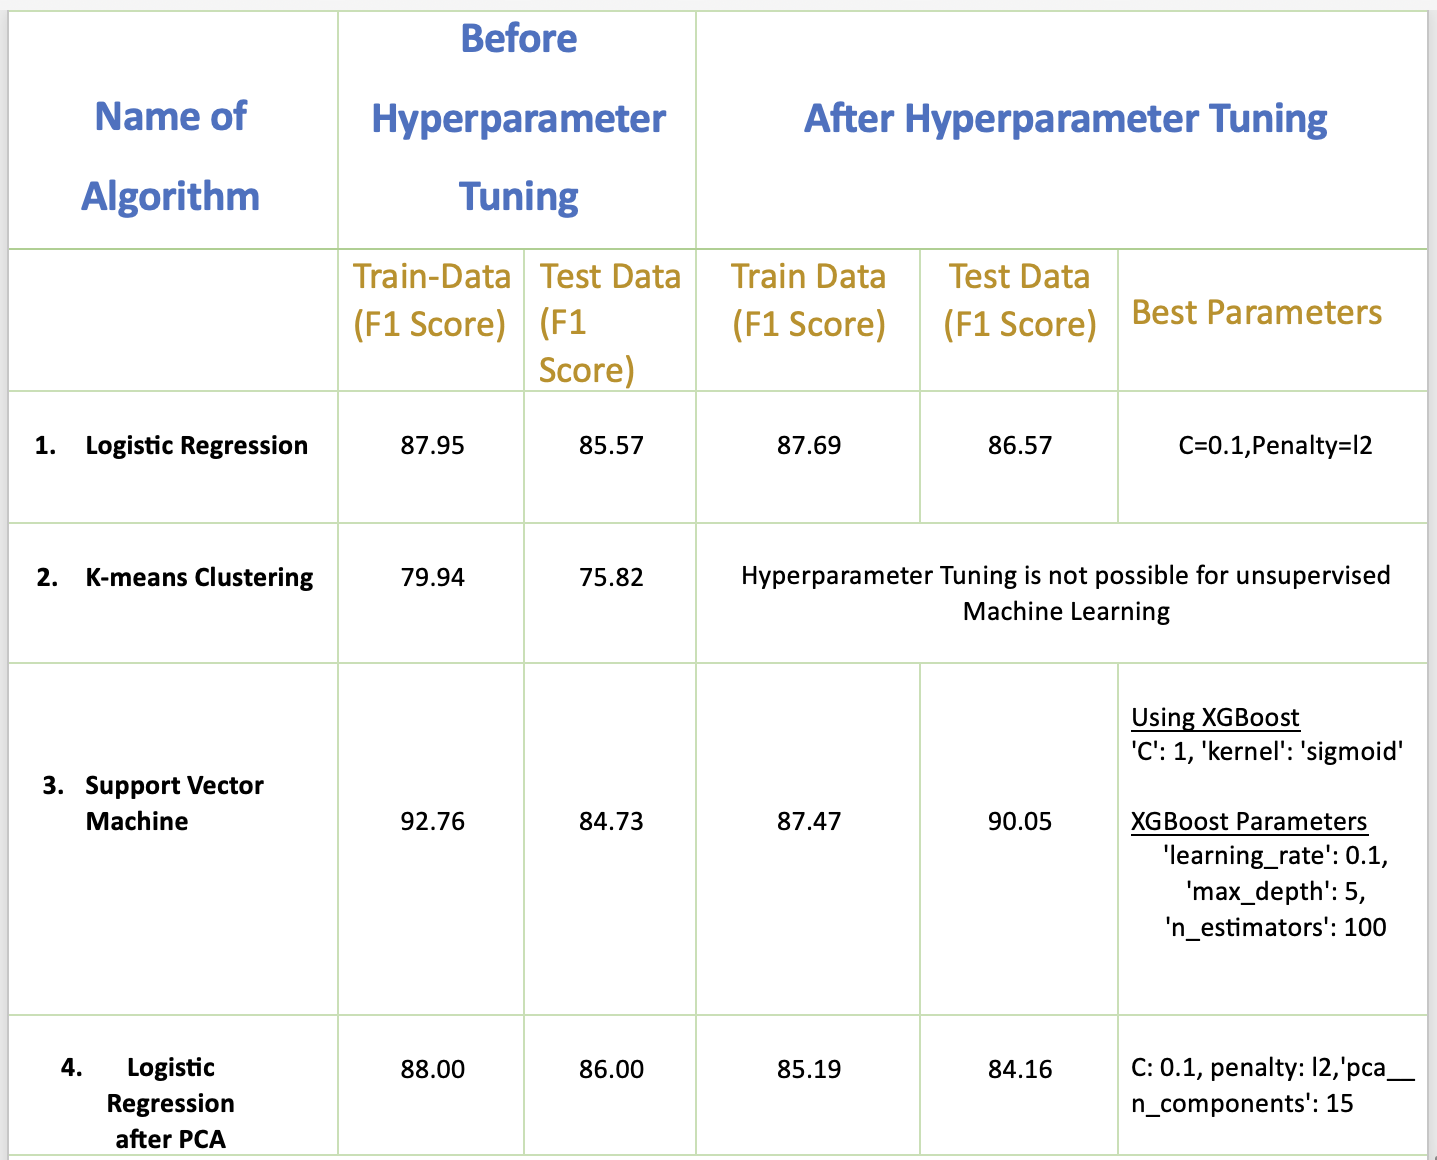

## Report on Challenges Faced

1. Transforming unstructured data into tabular format, followed by exporting it into a CSV file.
2. Analyzing the data and identifying its requirements.
3. During the conversion of Object data type to Numerical data type, manual encoding was necessary for all        columns.
4. Integrating all Machine Learning models into a unified code for improved accessibility and clarity.